In [2]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.Installing collected packages: idna, charset-normalizer, urllib3, requests, torchvision



In [4]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import os
from os import path
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
import cv2
import PIL
from PIL import Image

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


Get the data from dataset

In [5]:
import cv2

In [3]:
file_name = "../DataLoader/Dataset/Data/" # nom de mon fichier dans lequel se trouve mes données

In [4]:
glob.glob(file_name+"/*/*")

['../DataLoader/Dataset/Data\\cheetah-resize-224\\cheetah-resize-224',
 '../DataLoader/Dataset/Data\\cheetah-resize-300\\resize-300',
 '../DataLoader/Dataset/Data\\cheetah-resize-512\\resize-512',
 '../DataLoader/Dataset/Data\\fox-resize-224\\fox-resize-224',
 '../DataLoader/Dataset/Data\\fox-resize-300\\fox-resize-300',
 '../DataLoader/Dataset/Data\\fox-resize-512\\fox-resize-512',
 '../DataLoader/Dataset/Data\\hyena-resize-224\\hyena-resize-224',
 '../DataLoader/Dataset/Data\\hyena-resize-300\\resize-300',
 '../DataLoader/Dataset/Data\\hyena-resize-512\\resize-512',
 '../DataLoader/Dataset/Data\\lion-resize-224\\lion-resize-224',
 '../DataLoader/Dataset/Data\\lion-resize-300\\lion-resize-300',
 '../DataLoader/Dataset/Data\\lion-resize-512\\lion-resize-512',
 '../DataLoader/Dataset/Data\\tiger-resize-224\\tiger-resize-224',
 '../DataLoader/Dataset/Data\\tiger-resize-300\\tiger-resize-300',
 '../DataLoader/Dataset/Data\\tiger-resize-512\\tiger-resize-512',
 '../DataLoader/Dataset/Data\

In [5]:
list_files = glob.glob(file_name+"/*") # chargement de la liste des fichiers
categories = ['cheetah','fox','hyena','lion','tiger','wolf']
resolution = [224,224] # la resolution avec laquelle on va travailler

In [6]:
list_files

['../DataLoader/Dataset/Data\\cheetah-resize-224',
 '../DataLoader/Dataset/Data\\cheetah-resize-300',
 '../DataLoader/Dataset/Data\\cheetah-resize-512',
 '../DataLoader/Dataset/Data\\fox-resize-224',
 '../DataLoader/Dataset/Data\\fox-resize-300',
 '../DataLoader/Dataset/Data\\fox-resize-512',
 '../DataLoader/Dataset/Data\\hyena-resize-224',
 '../DataLoader/Dataset/Data\\hyena-resize-300',
 '../DataLoader/Dataset/Data\\hyena-resize-512',
 '../DataLoader/Dataset/Data\\lion-resize-224',
 '../DataLoader/Dataset/Data\\lion-resize-300',
 '../DataLoader/Dataset/Data\\lion-resize-512',
 '../DataLoader/Dataset/Data\\tiger-resize-224',
 '../DataLoader/Dataset/Data\\tiger-resize-300',
 '../DataLoader/Dataset/Data\\tiger-resize-512',
 '../DataLoader/Dataset/Data\\wolf-resize-224',
 '../DataLoader/Dataset/Data\\wolf-resize-300',
 '../DataLoader/Dataset/Data\\wolf-resize-512']

In [7]:
cheetah_files =  glob.glob(list_files[0]+"/*/*")
fox_files =  glob.glob(list_files[3]+"/*/*")
hyena_files =  glob.glob(list_files[6]+"/*/*")
lion_files = glob.glob(list_files[9]+"/*/*") # lecture des image du fichier de l'animal
tiger_files =  glob.glob(list_files[12]+"/*/*")
wolf_files =  glob.glob(list_files[15]+"/*/*")

In [8]:
folders = [cheetah_files,fox_files, hyena_files, lion_files, tiger_files, wolf_files]

Visualisation

In [13]:
def VisualizeData(file, num_images, label):
    num = 60
    print(f"there are {len(file)} images in the folder {label}")
    plt.figure(figsize=(20,10),facecolor="silver") 
#     print('before for')
    for num_1 in range(num,num+num_images):
#         print(f'before suplot num1 is {num_1}')
        plt.subplot(3,3,num_1-num+1)
#         print(file[num_1])
        image = cv2.imread(file[num_1]) # lecture d'une seule image
        plt.imshow(image, aspect = 'equal')

there are 343 images in the folder cheetah
there are 250 images in the folder fox
there are 306 images in the folder hyena
there are 294 images in the folder lion
there are 269 images in the folder tiger
there are 263 images in the folder wolf


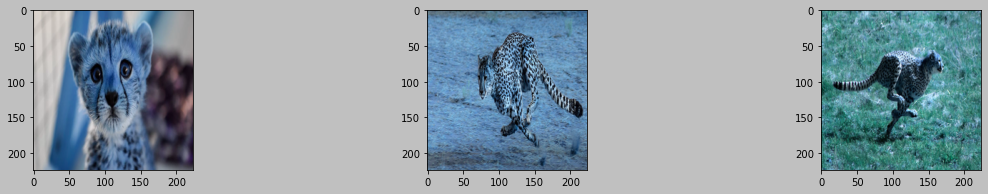

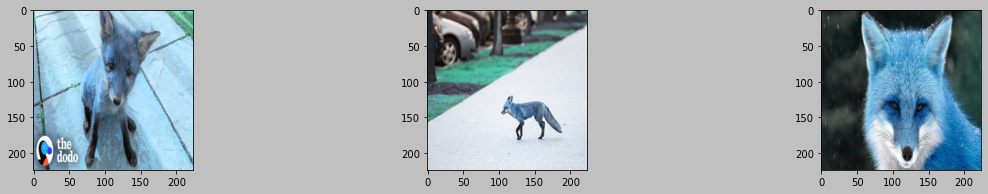

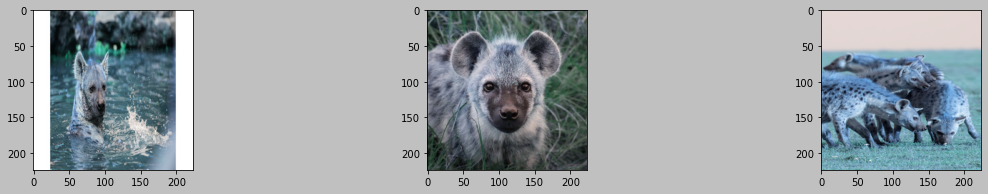

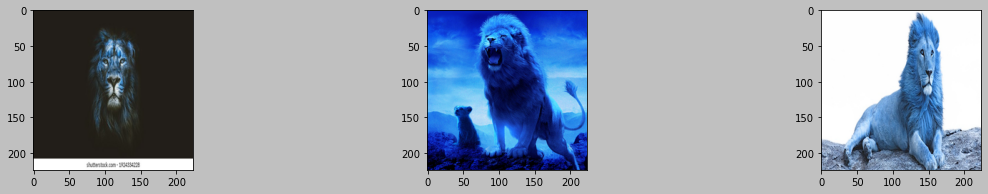

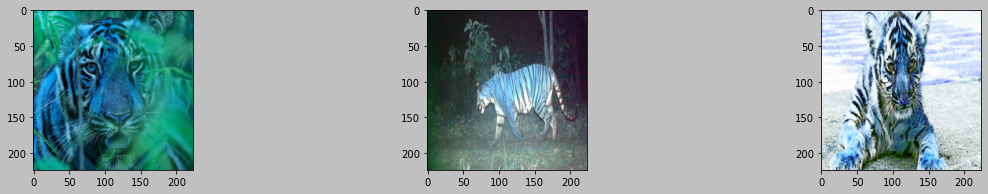

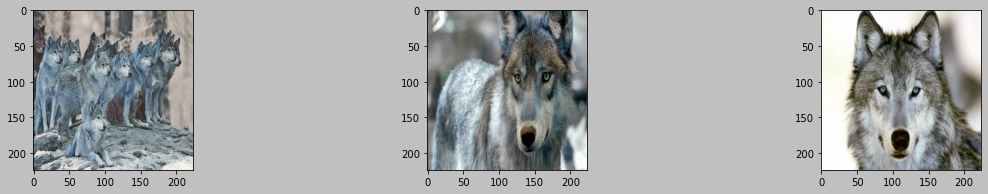

In [14]:
count = 0
for folder in folders:
    label = folder[1].split('-')[0].split('\\')[1]
#     count += 1
# #     print(folder)
# #     print(count)
#     print(folder[60])
    VisualizeData(folder, 3, label)

In [10]:
data_lst = []
for folder in folders:
    for file in folder:
         data_lst.append(
        {
            'path': file,
            'label': file.split('-')[0].split('\\')[1],
        }
    )
data_df = pd.DataFrame(data_lst)

In [14]:
print(len(data_lst))
print(len(data_df))
data_df.head()

1725
1725


,path,label
0,../DataLoader/Dataset/Data\cheetah-resize-224\...,cheetah
1,../DataLoader/Dataset/Data\cheetah-resize-224\...,cheetah
2,../DataLoader/Dataset/Data\cheetah-resize-224\...,cheetah
3,../DataLoader/Dataset/Data\cheetah-resize-224\...,cheetah
4,../DataLoader/Dataset/Data\cheetah-resize-224\...,cheetah


In [15]:
#encode labels to numeric labels
data_df['label_int'] = pd.Categorical(data_df['label']).codes
display(data_df)

,path,label,label_int
0,../DataLoader/Dataset/Data\cheetah-resize-224\...,cheetah,0
1,../DataLoader/Dataset/Data\cheetah-resize-224\...,cheetah,0
2,../DataLoader/Dataset/Data\cheetah-resize-224\...,cheetah,0
3,../DataLoader/Dataset/Data\cheetah-resize-224\...,cheetah,0
4,../DataLoader/Dataset/Data\cheetah-resize-224\...,cheetah,0
...,...,...,...
1720,../DataLoader/Dataset/Data\wolf-resize-224\wol...,wolf,5
1721,../DataLoader/Dataset/Data\wolf-resize-224\wol...,wolf,5
1722,../DataLoader/Dataset/Data\wolf-resize-224\wol...,wolf,5
1723,../DataLoader/Dataset/Data\wolf-resize-224\wol...,wolf,5


In [17]:
data_df.to_csv('wild_animals.csv')

In [15]:
df = pd.read_csv('wild_animals.csv')
path = df.iloc[30,1]
display(df)
print(path)

,Unnamed: 0,path,label,label_int
0,0,../DataLoader/Dataset/Data\cheetah-resize-224\...,cheetah,0
1,1,../DataLoader/Dataset/Data\cheetah-resize-224\...,cheetah,0
2,2,../DataLoader/Dataset/Data\cheetah-resize-224\...,cheetah,0
3,3,../DataLoader/Dataset/Data\cheetah-resize-224\...,cheetah,0
4,4,../DataLoader/Dataset/Data\cheetah-resize-224\...,cheetah,0
...,...,...,...,...
1720,1720,../DataLoader/Dataset/Data\wolf-resize-224\wol...,wolf,5
1721,1721,../DataLoader/Dataset/Data\wolf-resize-224\wol...,wolf,5
1722,1722,../DataLoader/Dataset/Data\wolf-resize-224\wol...,wolf,5
1723,1723,../DataLoader/Dataset/Data\wolf-resize-224\wol...,wolf,5


../DataLoader/Dataset/Data\cheetah-resize-224\cheetah-resize-224\00000035_224resized.png


In [16]:
image = cv2.imread(str(path))

In [17]:
print(image.shape)

(224, 224, 3)


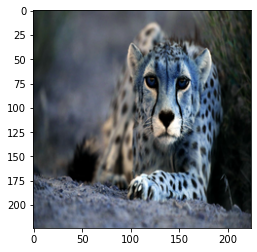

In [18]:
plt.imshow(image)

In [19]:
class WildAnimalsDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.transform = transform
        
    def __len__(self):
        return len(self.annotations) #1725
    
    def __getitem__(self,index):
        img_path = self.annotations.iloc[index,1]
        image = mpimg.imread(str(img_path))
        y_label = torch.tensor(int(self.annotations.iloc[index,3]))
        
        if self.transform:
            image = self.transform(image)
            
        return (image, y_label)
    
    

In [20]:
dataset = WildAnimalsDataset(csv_file ='wild_animals.csv')

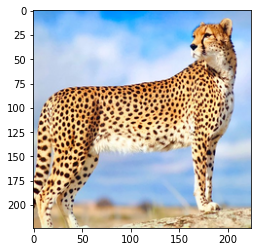

In [22]:
image,label = dataset[56]
plt.imshow(image)